<div style = "text-align: center">
    <img src = "Banner.png" width = "100%" style = "border: solid; border-radius: 10px"></img>
</div>

<h1 style="text-align:center;">Otimização Numérica Univariada com o Python</h1>

por **Elias Helou**

**ICMC/USP - São Carlos SP**

<h2>Tópicos da Aula</h2>

1. Otimização da lata cilíndrica

    1.1. O problema

    1.2. Modelagem matemática

    1.3. Visualizando o problema

    1.4. Simplificando o modelo

    1.5. Resolvendo o modelo

<!-- 2. O que é otimização?

    2.1. Otimização

    2.2. Otimização matemática

    2.3. Otimização numérica -->

<h2>1. Otimização da lata cilíndrica</h2>

<h3>1.1. O problema</h3>

<div style = 'display: flex; vertical-align: middle; width: 100%;'>
<div style = 'width: 25%;'>
<img src = 'cilindro.png'></img>
</div>
<div style = 'width: 75%;'>

> Imagine um produto que será vendido em latas cilíndricas e que cada lata do produto precisa ter o volume fixo $v$.
\
\
\
Quais devem ser as dimensões da lata?

</div>
</div>


<h3>1.2. Modelagem matemática</h3>

<div style = 'display: flex; vertical-align: middle; width: 100%;'>
<div style = 'width: 25%;'>
<img src = 'cilindro.png'></img>
</div>
<div style = 'width: 75%;'>

O volume de um cilindro é determinado por sua altura $a$ e seu raio $r$ da seguinte maneira:

> $$\large
    V( a, r ) = \pi a r^2.
$$

As dimensões da lata devem satisfazer
> $$\large
    V( a, r ) = v,
$$
ou seja,
> $$\large
    \pi a r^2 = v.
$$

</div>
</div>

O custo da lata é dominado pela quantidade de material usado na sua fabricação:
> $$\large
    A( a, r ) = 2\pi r^2 + 2\pi ra = 2\pi r( r + a ).
$$

Desejamos as dimensões (altura $a$ e raio $r$) da lata que possui volume $v$ com menor custo:
> $$\large
    \begin{align*}
        \min_{a, r}& \quad A( a, r )\\
        \text{s.a:}& \quad V( a, r ) = v.
    \end{align*}
$$
Ou ainda:
> $$\large
    \begin{align*}
        \min_{a, r}& \quad 2\pi r( r + a )\\
        \text{s.a:}& \quad \pi a r^2 = v.
    \end{align*}
$$

> ⚠️ Um modelo de otimização é sempre uma simplificação da realidade. Compete ao modelador encontrar um equilíbrio entre simplicidade do modelo e adequação à tarefa em mãos.

<h3>1.3. Visualizando o Problema</h3>

Sempre que possível, é interessante olhar representações gráficas do problema. Por exemplo, podemos observar o comportamento da função que desejamos minimizar

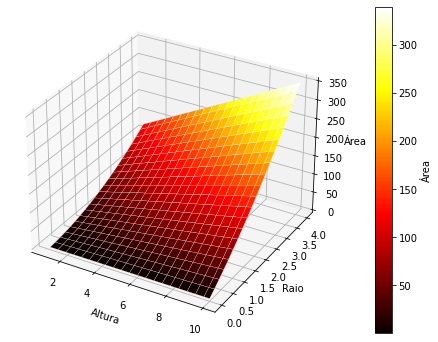

In [1]:
import numpy as np
import matplotlib.pyplot as pp

vol = 50.0

a_mx = 10.0

def a2r( a ):
    return ( vol / ( np.pi * a ) ) ** 0.5

N = 60
a = np.linspace( 1.0, a_mx, N )
r = np.linspace( 0.0, np.max( a2r( a ) ), N )
aa, rr = np.meshgrid( a, r )

def A( a, r ):
    return 2 * np.pi * r * ( r + a )

Z = A( aa, rr )

fig = pp.figure( figsize = ( 15, 6 ) )

rs = cs = 3
alpha = 1.0
cmap = pp.cm.hot

ax = fig.add_subplot( 1, 1, 1, projection = '3d' )
surf = ax.plot_surface( aa, rr, Z, alpha = alpha, cmap = cmap, rstride = rs, cstride = cs, linewidth = 0.2, edgecolor = 'white' )
ax.set_xlabel( 'Altura' )
ax.set_ylabel( 'Raio' )
ax.set_zlabel( 'Área' )
pp.colorbar( surf, label = 'Área' )

pp.show()


<h3>1.4. Simplificando o Modelo</h3>

Nosso modelo de otimização ficou

> $$\large
    \begin{align*}
        \min_{a, r}& \quad 2\pi r( r + a )\\
        \text{s.a:}& \quad \pi a r^2 = v.
    \end{align*}
$$

A igualdade
> $$\large
    \pi a r^2 = v
$$
é uma *restrição* do problema.

Restrições complicam a solução do modelo, mas, nesse caso, essa restrição nos ajudará a simplificar o problema, pois
> $$\large
    r = \sqrt{\frac{v}{\pi a}}.
$$

Portanto, podemos eliminar a variável $r$ do problema!
> $$\large
    \min_{a, r}\quad 2\pi r( r + a ) = 2\pi \sqrt{\frac{v}{\pi a}}\left( \sqrt{\frac{v}{\pi a}} + a \right).
$$

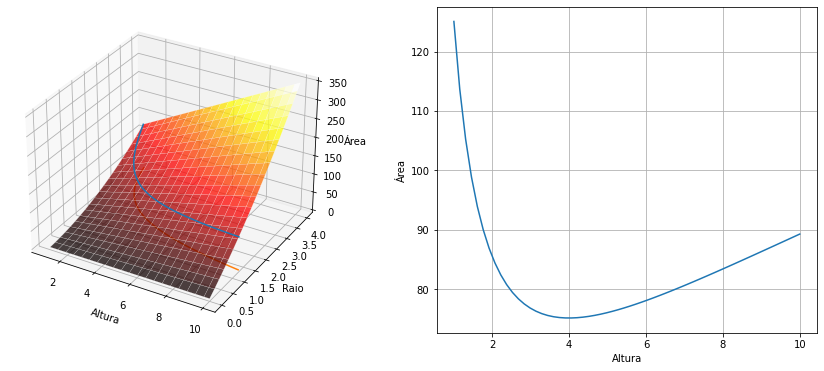

In [2]:
fig = pp.figure( figsize = ( 15, 6 ) )

ax = fig.add_subplot( 1, 2, 1, projection = '3d' )
ax.plot3D( a, a2r( a ), A( a, a2r( a ) ), zorder = 10 )
ax.plot3D( a, a2r( a ), np.zeros_like( a ), zorder = 1 )
surf = ax.plot_surface( aa, rr, Z, alpha = alpha * 0.75, cmap = cmap, rstride = rs, cstride = cs, linewidth = 0.2, edgecolor = 'white' )
ax.set_xlabel( 'Altura' )
ax.set_ylabel( 'Raio' )
ax.set_zlabel( 'Área' )

ax = fig.add_subplot( 1, 2, 2 )
ax.plot( a, A( a, a2r( a ) ) )
ax.set_xlabel( 'Altura' )
ax.set_ylabel( 'Área' )
ax.grid()

pp.show()

<h3>1.5. Resolvendo o Modelo</h3>

O problema que obtivemos é
> $$\large
    \min_{a}\quad 2\pi \sqrt{\frac{v}{\pi a}}\left( \sqrt{\frac{v}{\pi a}} + a \right).
$$


Este é um problema de uma variável (problema 'escalar') e pode ser resolvido rapidamente utilizando a função `scipy.optimize.minimize_scalar`, como no exemplo a seguir:


In [3]:
import scipy.optimize as opt
import numpy as np

vol = 50

def A( a, r ):
    return 2 * np.pi * r * ( r + a )
def f( a ):
    return A( a, ( vol / ( np.pi * a ) ) ** 0.5 )

res = opt.minimize_scalar( f, bracket = ( 1.0e-4, 10 ) )
a_opt = res.x
r_opt = ( vol / ( np.pi * a_opt ) ) ** 0.5

print( a_opt, r_opt )


3.992945364296456 1.9964727274171965


In [4]:
print( res )

     fun: 75.1325069828408
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 19
     nit: 15
 success: True
       x: 3.992945364296456


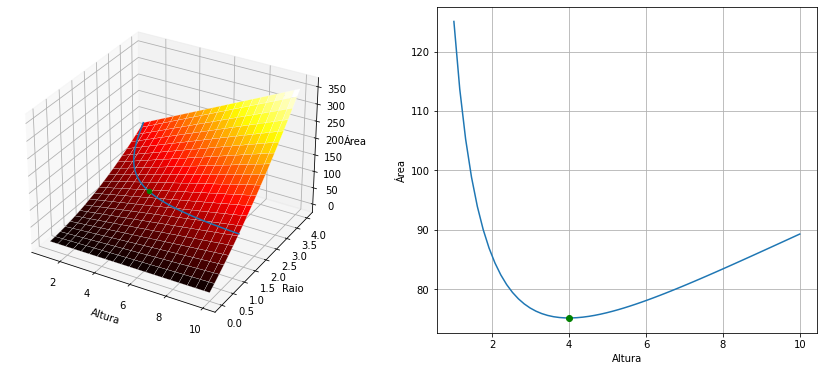

Altura:  3.992945364296456
Raio  :  1.9964727274171965
Área  :  75.1325069828408
Volume:  49.99999999999999


In [5]:
fig = pp.figure( figsize = ( 15, 6 ) )

ax = fig.add_subplot( 1, 2, 1, projection = '3d', computed_zorder = False )
ax.plot3D( a, a2r( a ), A( a, a2r( a ) ), zorder = 10 )
surf = ax.plot_surface( aa, rr, Z, alpha = alpha, cmap = cmap, rstride = rs, cstride = cs, linewidth = 0.2, edgecolor = 'white' )
ax.scatter3D( a_opt, a2r( a_opt ), A( a_opt, a2r( a_opt ) ), c = 'green', zorder = 10 )
ax.set_xlabel( 'Altura' )
ax.set_ylabel( 'Raio' )
ax.set_zlabel( 'Área' )

ax = fig.add_subplot( 1, 2, 2 )
ax.plot( a, A( a, a2r( a ) ) )
ax.scatter( a_opt, A( a_opt, a2r( a_opt ) ), c = 'green', zorder = 10 )
ax.set_xlabel( 'Altura' )
ax.set_ylabel( 'Área' )
ax.grid()

pp.show()

print( 'Altura: ', a_opt )
print( 'Raio  : ', a2r( a_opt ) )
print( 'Área  : ', f( a_opt ) )
print( 'Volume: ', np.pi * a2r( a_opt ) ** 2 * a_opt )


In [6]:
help( opt.minimize_scalar )

Help on function minimize_scalar in module scipy.optimize._minimize:

minimize_scalar(fun, bracket=None, bounds=None, args=(), method='brent', tol=None, options=None)
    Minimization of scalar function of one variable.
    
    Parameters
    ----------
    fun : callable
        Objective function.
        Scalar function, must return a scalar.
    bracket : sequence, optional
        For methods 'brent' and 'golden', `bracket` defines the bracketing
        interval and can either have three items ``(a, b, c)`` so that
        ``a < b < c`` and ``fun(b) < fun(a), fun(c)`` or two items ``a`` and
        ``c`` which are assumed to be a starting interval for a downhill
        bracket search (see `bracket`); it doesn't always mean that the
        obtained solution will satisfy ``a <= x <= c``.
    bounds : sequence, optional
        For method 'bounded', `bounds` is mandatory and must have two items
        corresponding to the optimization bounds.
    args : tuple, optional
        E

<h2>O que é Otimização?</h2>

<h3>Otimização</h3>

> Escolher a melhor dentre todas as formas possíveis de realizar uma atividade

Exemplos:

-   Atividade: ir de um ponto de origem a um ponto de destino
    
    Decisão a tomar: caminho a percorrer

    Decisão possível: começa na origem, termina no destino

    Decisão ótima: caminho de menor tempo

- Atividade: produzir uma lata cilíndrica de um dado volume
    
    Decisão a tomar: dimensões da lata

    Decisão possível: resultam no volume correto

    Decisão ótima: lata que usa a menor quantidade de material


<h3>Otimização Matemática</h3>

> Muitas vezes, problemas de otimização podem ser codificados matematicamente.

- cada decisão é representada por um vetor $\boldsymbol x \in \mathbb R^n$

- o critério para seleção é uma função $f : \mathbb R^n \to \mathbb R$

- e as decisões possíveis são elementos de um conjunto $\mathbb X \subset \mathbb R^n$

- de forma compacta, temos problemas do tipo:
$$\large%
\begin{align*}
    \min\quad &f( \boldsymbol x )\\
    \text{s.a:}\quad &\boldsymbol x \in \mathbb X.
\end{align*}%
$$

> Do ponto de vista matemático, $f$ e $\mathbb X$ são suficientes para definir o problema de otimização. Entretanto, para interpretar uma solução é preciso saber relacionar cada $\boldsymbol x \in \mathbb X$ com uma decisão a ser tomada

> O processo de codificação de um problema de otimização em um problema de otimização matemática é chamado de modelagem

<h3>Otimização Numérica</h3>

> Técnicas numéricas e computacionais para obter a solução numérica de um problema de otimização matemática. Os algoritmos numéricos são específicos para características do problema:

- Tamanho:

    - univariado (escalar, unidimensional)
    - poucas variáveis (ajuste de retas e curvas, inferência paramétrica)
    - muitas variáveis (tratamento de imagens)
    - muitíssimas variáveis (aprendizado profundo)

- Estrutura:

    - linear
    - quadrático
    - convexo / não-convexo
    - suave / não-suave
    - combinatorial
    - multiobjetivo

- Restrições:

    - sem restrições ($\mathbb X = \mathbb R^n$)
    - restrições simples
    - restrições complexas

- Informação disponível (oráculo):

    - exata / inexata
    - valor funcional
    - valor de derivadas
    - determinística / estocástica